Nama: Lis Wahyuni

Download dataset from Kaggle

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"liswahyuni","key":"755a70295838cc1d8a2eb09504e11f93"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp /content/kaggle.json ~/.kaggle/

In [ ]:
# Permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# List all datasets in Kaggle
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-09-03 10:07:19          11858  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           7211  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2820  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2846  
nickuzmenkov/nih-chest-xrays-tfrecords                      NIH Chest X-rays

In [ ]:
!kaggle datasets download -d budincsevity/szeged-weather

  0% 0.00/2.23M [00:00<?, ?B/s]
100% 2.23M/2.23M [00:00<00:00, 74.8MB/s]


In [ ]:
!ls

kaggle.json  sample_data  szeged-weather.zip


In [ ]:
!unzip szeged-weather.zip

Archive:  szeged-weather.zip
  inflating: weatherHistory.csv      


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('weatherHistory.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [ ]:
df = df.drop(columns=['Loud Cover', 'Daily Summary'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
dtypes: float64(7), object(3)
memory usage: 7.4+ MB


In [ ]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

In [ ]:
df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [ ]:
df_new = df.dropna()

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95936 non-null  object 
 1   Summary                   95936 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           95936 non-null  float64
 4   Apparent Temperature (C)  95936 non-null  float64
 5   Humidity                  95936 non-null  float64
 6   Wind Speed (km/h)         95936 non-null  float64
 7   Wind Bearing (degrees)    95936 non-null  float64
 8   Visibility (km)           95936 non-null  float64
 9   Pressure (millibars)      95936 non-null  float64
dtypes: float64(7), object(3)
memory usage: 8.1+ MB


In [ ]:
print(f"Old dataframe shape: {df.shape}")
print(f"New dataframe shape: {df_new.shape}")

Old dataframe shape: (96453, 10)
New dataframe shape: (95936, 10)


In [ ]:
import numpy as np
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [ ]:
# I choose only "Formatted Date" and "Temperature (C)" as input
df_new = df_new.drop(columns=['Summary', 'Precip Type', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)'], axis=1)
df_new

,Formatted Date,Temperature (C)
0,2006-04-01 00:00:00.000 +0200,9.472222
1,2006-04-01 01:00:00.000 +0200,9.355556
2,2006-04-01 02:00:00.000 +0200,9.377778
3,2006-04-01 03:00:00.000 +0200,8.288889
4,2006-04-01 04:00:00.000 +0200,8.755556
...,...,...
96448,2016-09-09 19:00:00.000 +0200,26.016667
96449,2016-09-09 20:00:00.000 +0200,24.583333
96450,2016-09-09 21:00:00.000 +0200,22.038889
96451,2016-09-09 22:00:00.000 +0200,21.522222


In [ ]:
df_new["Formatted Date"] = pd.to_datetime(df_new["Formatted Date"], utc=True)

dates = df_new['Formatted Date'].values
temp  = df_new['Temperature (C)'].values

In [ ]:
df_new["Formatted Date"]

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Formatted Date, Length: 95936, dtype: datetime64[ns, UTC]

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Formatted Date   95936 non-null  datetime64[ns, UTC]
 1   Temperature (C)  95936 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 2.2 MB


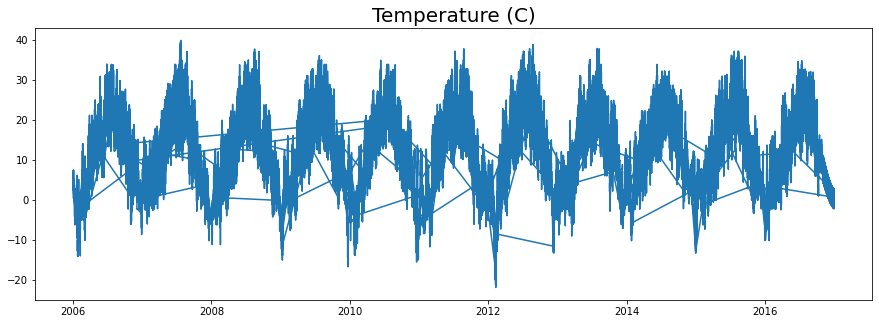

In [ ]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Temperature (C)', fontsize=20);

In [ ]:
# split data jadi training-testing
from sklearn.model_selection import train_test_split
dates_train, dates_test, temp_train, temp_test = train_test_split(dates, temp, test_size=0.2, shuffle=False)

In [ ]:
dates_train

array(['2006-03-31T22:00:00.000000000', '2006-03-31T23:00:00.000000000',
       '2006-04-01T00:00:00.000000000', ...,
       '2014-11-15T19:00:00.000000000', '2014-11-15T20:00:00.000000000',
       '2014-11-15T21:00:00.000000000'], dtype='datetime64[ns]')

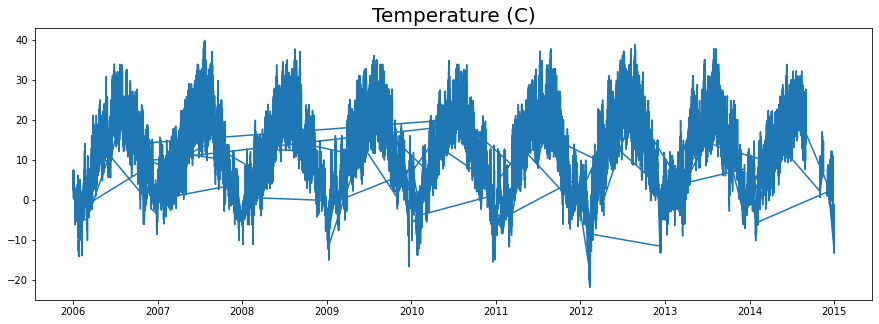

In [ ]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

plt.figure(figsize=(15,5))
plt.plot(dates_train, temp_train)
plt.title('Temperature (C)', fontsize=20);

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
from tensorflow import keras
from keras import regularizers
from keras.regularizers import l2

train_set = windowed_dataset(temp_train, window_size=24, batch_size=100, shuffle_buffer=1000)
test_set = windowed_dataset(temp_test, window_size=24, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(16, return_sequences=True, kernel_regularizer=l2(0.1), bias_regularizer=l2(0.1)),
  tf.keras.layers.LSTM(16),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dropout(0.15),
  tf.keras.layers.Dense(4, activation='sigmoid'),
  tf.keras.layers.Dense(1)
])

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
max = df['Temperature (C)'].max()
min = df['Temperature (C)'].min()
mae_skala_data = 0.1*(max-min)

print("Max Value Temp: ", max)
print("Min Value Temp: ", min)
print("Mae: ", mae_skala_data)

Max Value Temp:  39.90555555555555
Min Value Temp:  -21.822222222222226
Mae:  6.172777777777778


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if((logs.get('mae')<mae_skala_data and logs.get('val_mae')<mae_skala_data)):
      print("\nMAE dan Validasi MAE telah kurang dari 10% skala data.")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
history = model.fit(train_set, epochs=200, validation_data=(test_set), verbose=2, callbacks=[callbacks])

Epoch 1/200
768/768 - 32s - loss: 13.9034 - mae: 12.7342 - val_loss: 13.2669 - val_mae: 12.2681
Epoch 2/200
768/768 - 25s - loss: 13.1081 - mae: 12.2520 - val_loss: 12.7319 - val_mae: 12.0070
Epoch 3/200
768/768 - 26s - loss: 12.6701 - mae: 12.0571 - val_loss: 12.3613 - val_mae: 11.8523
Epoch 4/200
768/768 - 26s - loss: 12.3205 - mae: 11.9026 - val_loss: 12.0429 - val_mae: 11.7102
Epoch 5/200
768/768 - 25s - loss: 12.0107 - mae: 11.7546 - val_loss: 11.7419 - val_mae: 11.5581
Epoch 6/200
768/768 - 26s - loss: 11.7238 - mae: 11.6064 - val_loss: 11.4626 - val_mae: 11.4074
Epoch 7/200
768/768 - 26s - loss: 11.4601 - mae: 11.4648 - val_loss: 11.2089 - val_mae: 11.2659
Epoch 8/200
768/768 - 25s - loss: 11.2173 - mae: 11.3282 - val_loss: 10.9750 - val_mae: 11.1294
Epoch 9/200
768/768 - 27s - loss: 10.9940 - mae: 11.1956 - val_loss: 10.7609 - val_mae: 10.9972
Epoch 10/200
768/768 - 25s - loss: 10.7889 - mae: 11.0663 - val_loss: 10.5632 - val_mae: 10.8668
Epoch 11/200
768/768 - 25s - loss: 10.6

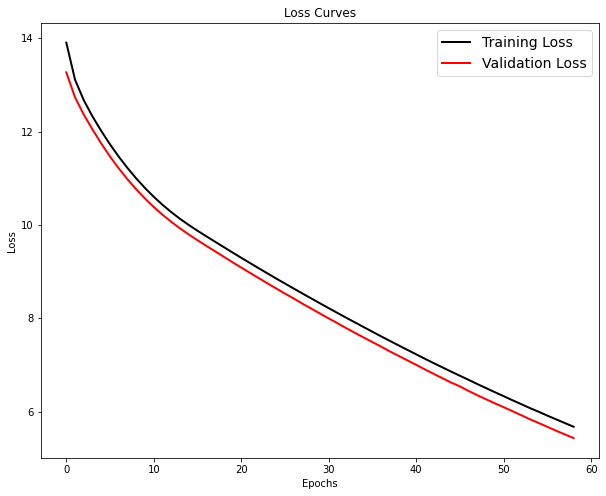

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=[10,8])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'red', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14, loc='best')
plt.title('Loss Curves', fontsize=12)
plt.ylabel('Loss', fontsize=10)
plt.xlabel('Epochs', fontsize=10)
plt.show()

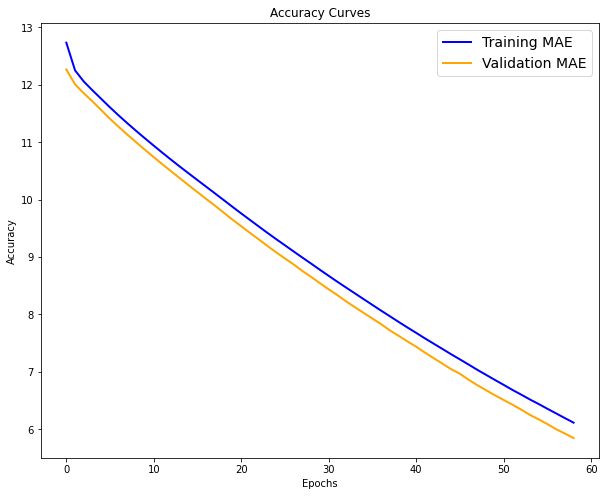

In [ ]:
plt.figure(figsize=[10,8])
plt.plot(history.history['mae'], 'blue', linewidth=2.0)
plt.plot(history.history['val_mae'], 'orange', linewidth=2.0)
plt.legend(['Training MAE', 'Validation MAE'], fontsize=14, loc='best')
plt.title('Accuracy Curves', fontsize=12)
plt.ylabel('Accuracy', fontsize=10)
plt.xlabel('Epochs', fontsize=10)
plt.show()